# Util code snippets
This notebook contains only isolated code snippets to do certain data manipulations and experiments that do not necessarily contribute to the main idea. This is only for reference on how secondary aspects might be achieved.

## Going from RGB to Black or White contour images

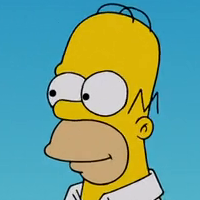

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from matplotlib import image as mpl_image

original = Image.open('images/homer.png')
original

### Grayscale

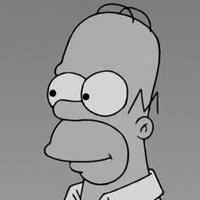

In [2]:
gray = original.convert('L')
gray

### Black & White - PIL point style

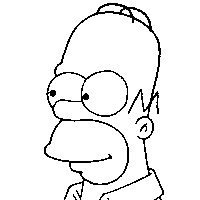

In [3]:
pil_bw = gray.point(lambda x: 0 if x<100 else 255, '1')
pil_bw

### Black & White - Pylab contour style

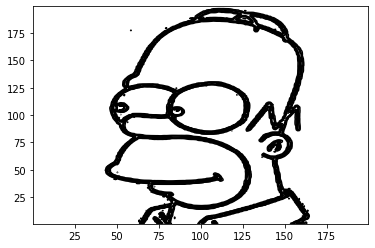

In [4]:
from pylab import contour

pylab_bw = contour(gray, colors='black', origin='image')
pylab_bw

### Black & White - OpenCV style

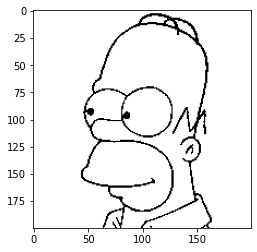

In [5]:
import cv2

original_cv2 = cv2.imread('images/homer.png')
# Grayscale
gray = cv2.cvtColor(original_cv2, cv2.COLOR_BGR2GRAY)
  
_, binary = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
plt.imshow(binary, cmap='gray')
plt.show()

In [7]:
pil_bw.save('images/homer_bw_pil.png')

### Create a corrupted image with gaussian noise

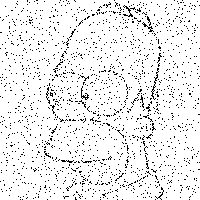

In [42]:
bw = np.array(pil_bw)
sigma = 0.6
width, height = bw.shape
bw_corrupted = bw + sigma * np.random.randn(width, height)
bw_corrupted[bw_corrupted > 0] = 255
bw_corrupted[bw_corrupted < 0] = 0
out = Image.fromarray(bw_corrupted).convert('L')
out.save('images/homer_bw_noise.png')
out

### Create a corrupted image with a mask

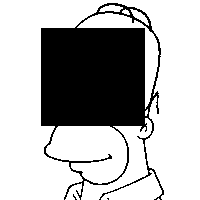

In [44]:
bw = np.array(pil_bw)
sigma = 0.6
width, height = bw.shape
bw_corrupted = bw.copy()
bw_corrupted[np.random.randint(0, height / 2):np.random.randint(width/2, height),
    np.random.randint(0, height/2):np.random.randint(width/2, height)] = 0
out = Image.fromarray(bw_corrupted).convert('L')
out.save('images/homer_bw_rand_mask.png')
out